KAGGLEDAN VERI ÇEKME

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/MusicGAN/

/content/drive/MyDrive/Colab Notebooks/MusicGAN


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imsparsh/musicnet-dataset

100% 21.5G/21.5G [05:12<00:00, 39.6MB/s]
100% 21.5G/21.5G [05:13<00:00, 73.7MB/s]


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet-dataset.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet-dataset.zip
  inflating: musicnet.npz            
  inflating: musicnet/musicnet/test_data/1759.wav  
  inflating: musicnet/musicnet/test_data/1819.wav  
  inflating: musicnet/musicnet/test_data/2106.wav  
  inflating: musicnet/musicnet/test_data/2191.wav  
  inflating: musicnet/musicnet/test_data/2298.wav  
  inflating: musicnet/musicnet/test_data/2303.wav  
  inflating: musicnet/musicnet/test_data/2382.wav  
  inflating: musicnet/musicnet/test_data/2416.wav  
  inflating: musicnet/musicnet/test_data/2556.wav  
  inflating: musicnet/musicnet/test_data/2628.wav  
  inflating: musicnet/musicnet/test_labels/1759.csv  
  inflating: musicnet/musicnet/test_labels/1819.csv  
  inflating: musicnet/musicnet/test_labels/2106.csv  
  inflating: musicnet/musicnet/test_labels/2191.csv  
  inflating: musicnet/musicnet/test_labels/2298.csv  
  inflating: musicnet/musicnet/test_labels/2303.csv  
  inflating: musicnet/musicnet/test_lab

IMPORTLAR VE KÜTÜPHANELERIN YUKLENMESİ

In [4]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install tensorflow-io
!pip install matplotlib


     |████████████████████████████████| 462 kB 5.2 MB/s 
     |████████████████████████████████| 497.5 MB 22 kB/s 
     |████████████████████████████████| 23.4 MB 73.1 MB/s 
     |████████████████████████████████| 2.1 MB 41.2 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.24.0
    Uninstalling tensorflow-io-gcs-filesystem-0.24.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.24.0


In [5]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


In [6]:
MUSIC_FILE=os.path.join('musicnet','musicnet','train_data','1727.wav')

In [7]:
def load_wav_16k_mono(file):
    file_contents=tf.io.read_file(file)
    # Üstte sesi okuyup altta decode ediyor
    wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)

    wav=tf.squeeze(wav,axis=-1)

    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    #Sinyal 44100Hzden 16000Hz'e azaltarak datayı azaltıyoruz
    wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
    return wav

EĞER BITTE SORUN ÇIKARSA

In [8]:
import soundfile
data, samplerate = soundfile.read(MUSIC_FILE)
soundfile.write('1727.wav', data, samplerate, subtype='PCM_16')

In [9]:
MUSIC_FILE=os.path.join('1727.wav')

<tf.Tensor: shape=(7152953,), dtype=float32, numpy=
array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -5.8951196e-07,  5.5376205e-07, -6.2522810e-07], dtype=float32)>

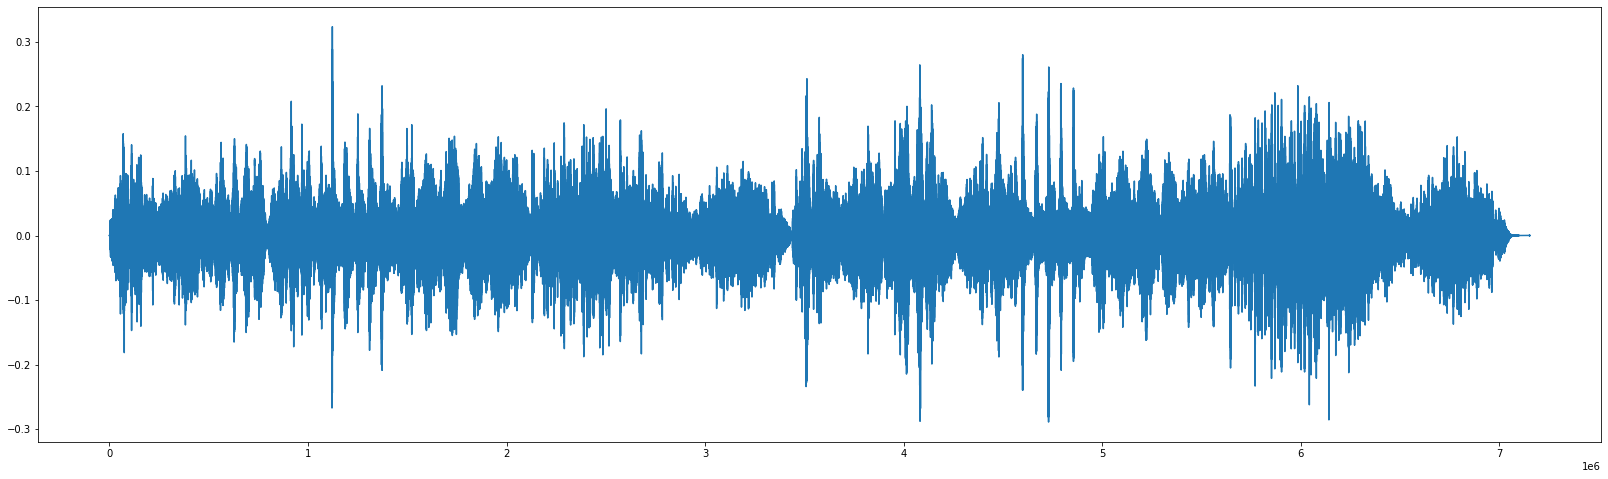

In [10]:
plt.figure(figsize=(28,8))
plt.plot(load_wav_16k_mono(MUSIC_FILE))
load_wav_16k_mono(MUSIC_FILE)

DATADA SORUN ÇIKTIĞI İÇİN DÖNÜŞÜM YAPIYORUM

In [ ]:
import soundfile
%cd /content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/new
for f in os.listdir('/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/train_data/'):
  print(f)
  data, samplerate = soundfile.read(f'/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/train_data/{f}')
  
  soundfile.write(f'{f}', data, samplerate, subtype='PCM_16')
  

UZUNLUKLARI

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/MusicGAN/
lengths=[]
for f in os.listdir(os.path.join('musicnet','musicnet','new')):
    tensor_wave=load_wav_16k_mono(os.path.join('musicnet','musicnet','new',f))
    lengths.append(len(tensor_wave))

In [ ]:
tf.math.reduce_mean(lengths)

In [ ]:
tf.math.reduce_min(lengths)

In [ ]:
tf.math.reduce_max(lengths)

In [ ]:
print(f'mean: {6069387/960000}dk, min: {883983/16000}sn, max: {17104561/960000}dk')

FOTOĞRAFA ÇEVİRİP GAN İÇİN KAYDEDİYORUM

In [ ]:
l=os.listdir(os.path.join('musicnet','musicnet','new'))

In [ ]:
def preprocess(file_path): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [ ]:
preprocess(f'/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/new/1727.wav').tolist()

In [ ]:
import numpy as np
import PIL
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/new/'):
  spectrogram= preprocess(f'/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/new/{i}')
  spectrogram.toarray()
  

In [ ]:
t=tensor_to_image(tf.transpose(spectrogram)[0])
  t.save('/content/drive/MyDrive/Colab Notebooks/MusicGAN/musicnet/musicnet/photoforgan2/data/{}.jpeg'.format(i.split('.wav')[0]))